# Car Price Prediction
![](https://cdn.dribbble.com/users/2374064/screenshots/4732016/car-jump.gif)

**Today, in this notebook we will work with the car price data set, where we will make some operations like cleaning data, explore it and we will create a ML model to deploy this data.
hope you enjoy it!!!!!**

# Import libs

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

[](http://www.google.fr/url?sa=i&url=https%3A%2F%2Fdribbble.com%2Fshots%2F4732016-Car-Jump-GIF-animation&psig=AOvVaw0y8Jb3aa7GZgVA2p5LkOjj&ust=1667523195660000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCLimz6fmkPsCFQAAAAAdAAAAABAF)

# Data discovering  

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [3]:
# first we start by visualizing the data we will use 
data_set = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
data_set.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# print the shape of the used data frame 
print('the shape of the car_price_prediction table is : ', data_set.shape)

the shape of the car_price_prediction table is :  (19237, 18)


In [5]:
data_set.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<AxesSubplot:ylabel='None'>

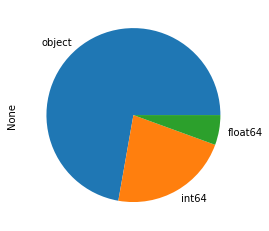

In [7]:
# visualize the total values using a pie plot
data_set.dtypes.value_counts().plot.pie()

In [8]:
#data.columns
num_col = ['Price', 'Prod. year', 'Cylinders', 'Airbags']
data_set[num_col].describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


# Data Cleaning/ Pre-Processing/ Exploratory Data Analysis

In [9]:
# we will make a copy from the original data_set to work on it 
data = data_set.copy()
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [10]:
# we can see that the ID field is useless 
data.drop(columns='ID', inplace=True)
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [11]:
# we have to rename some columns to make our work more easy 
data.rename(columns={'Prod. year': 'Prod_year'}, inplace=True)
data.rename(columns={'Leather interior': 'Leather_interior'}, inplace=True)
data.rename(columns={'Fuel type': 'Fuel_type'}, inplace=True)
data.rename(columns={'Engine volume': 'Engine_volume'}, inplace=True)
data.rename(columns={'Gear box type': 'Gear_box_type'}, inplace=True)
data.rename(columns={'Drive wheels': 'Drive_wheels'}, inplace=True)

In [12]:
# we will start by droping duplicates if they exists
data.drop_duplicates(inplace=True)
data.shape  # he new shape is (15725, 17)

(15725, 17)

In [13]:
# then will check the number of missing values in each column of training data
#missing = data.isna().sum()
missing = data.isnull().sum()
missing

Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [14]:
data.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
# as we can see from the above table that our data contain some empty cells in the 'Levy' column, thus we decide t check all columns 
# one by one but we found that 'Levy' is the only column with empty cells.
data['Levy'].value_counts()
# (5819 is a big number so we can't delete rows with this values thus will use other solutions like imputation)

-       5684
891      387
765      387
639      340
640      336
        ... 
2177       1
5666       1
3156       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

**Levy column**

In [16]:
# we will replace the '-' with null
data['Levy'].replace({'-':np.nan}, inplace = True)
# we have to convert the type of the Levy column  to float
data['Levy'] = data['Levy'].astype('float64')

<AxesSubplot:>

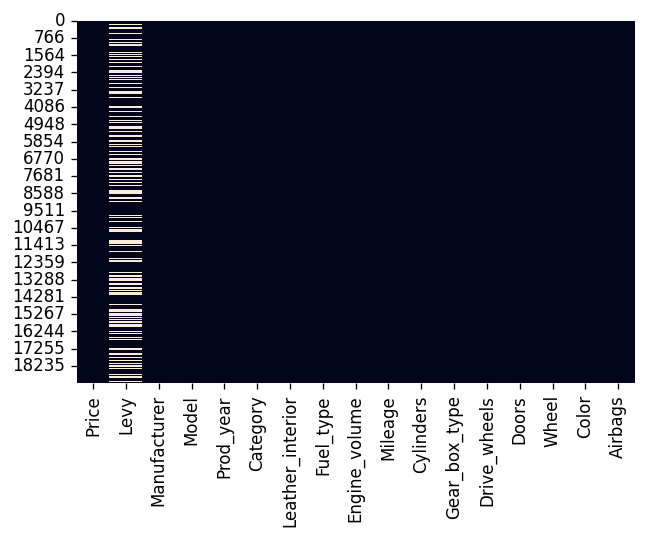

In [17]:
plt.figure(dpi=120)
sns.heatmap(data.isna(),cbar=False)

**Price column**

In [18]:
# we can see that there are many car with a price under the 500$, this is illogic
# we will keep only cars with price greater than 500 $
data = data[data['Price'] > 500]
data.shape # (14799, 17)

(14799, 17)

**Engine_volume column**

In [19]:
# The engine_volume column has float values with object type we have to convert them to float
# before that we have to deal with the "Turbo" cells
data['Turbo_engine'] = data['Engine_volume'].str.contains('Turbo')
data['Engine_volume'] = data['Engine_volume'].str.slice(0,3)
data['Engine_volume'] = data['Engine_volume'].astype('float64')

**Mileage column**

In [20]:
# we have to rename the Mileage column to Mileage/km
# change the type from object to int
data.rename(columns={'Mileage':'Mileage/km'}, inplace=True)
data['Mileage/km'] = data['Mileage/km'].str.strip('km')
data['Mileage/km'] = data['Mileage/km'].astype('int64')

**Cylinders column**

In [21]:
# change the type of the Cylinders column from float to int it is more logic 
data['Cylinders'] = data['Cylinders'].astype('int64')

**Doors column**

In [22]:
# the column Doors has wrong values like 04-May and 02-Mar
# and we have to change its type 
data['Doors'].replace({'04-May':4, '02-Mar': 2, '>5':5}, inplace = True)
data['Doors'] = data['Doors'].astype('int64')

**Create the categorical variables set**

In [23]:
categorical_col = data.select_dtypes(['object', 'boolean'])
categorical_col.head(2)

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Wheel,Color,Turbo_engine
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver,False
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black,False


**Create the numerical variable set**

In [24]:
numerical_col = data.select_dtypes(['int', 'float'])
numerical_col.head(2)

,Price,Levy,Prod_year,Engine_volume,Mileage/km,Cylinders,Doors,Airbags
0,13328,1399.0,2010,3.5,186005,6,4,12
1,16621,1018.0,2011,3.0,192000,6,4,8


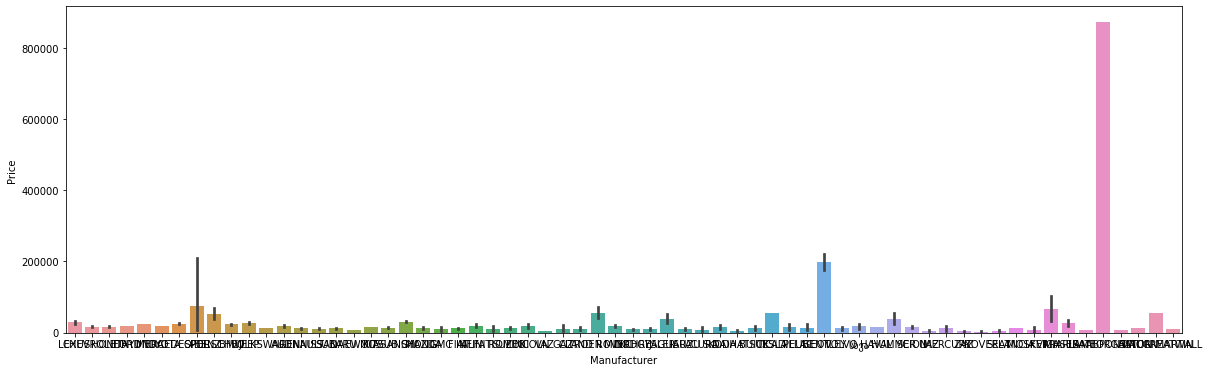

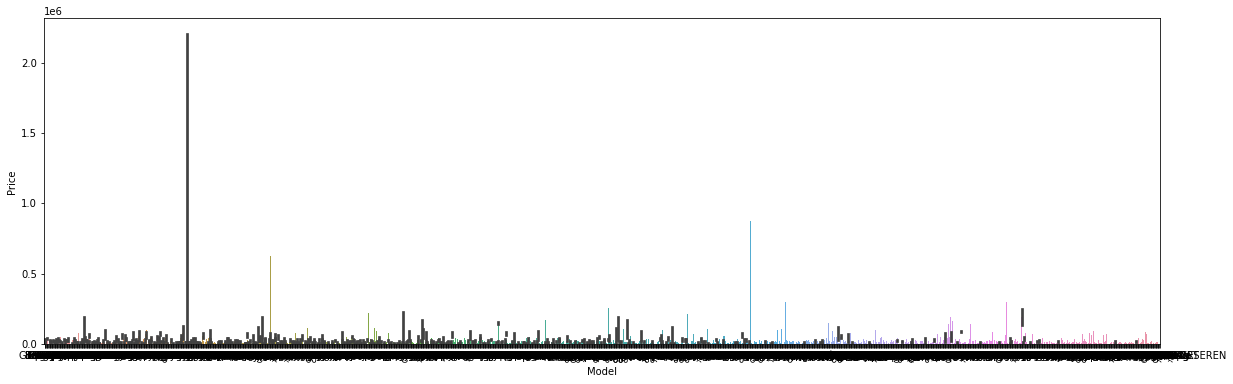

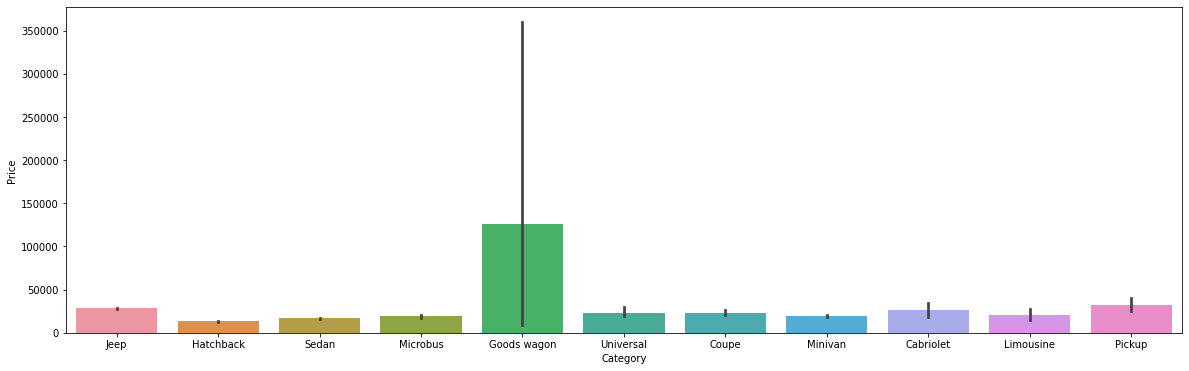

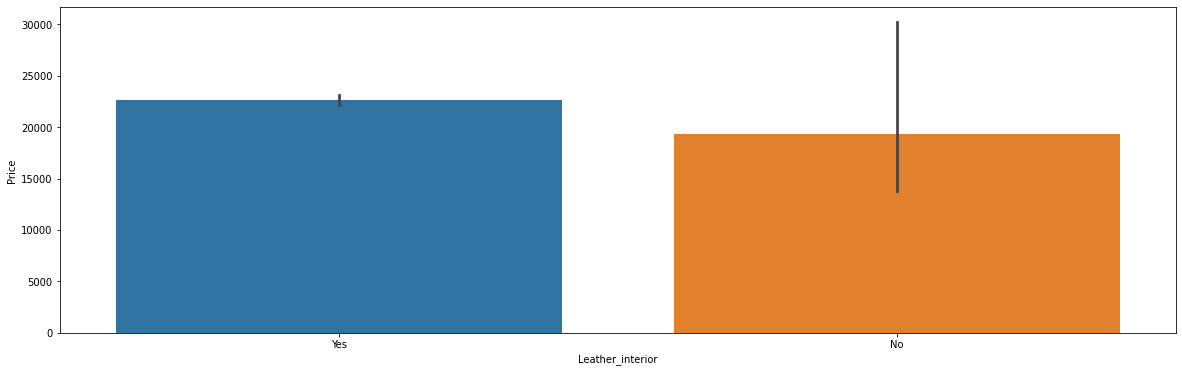

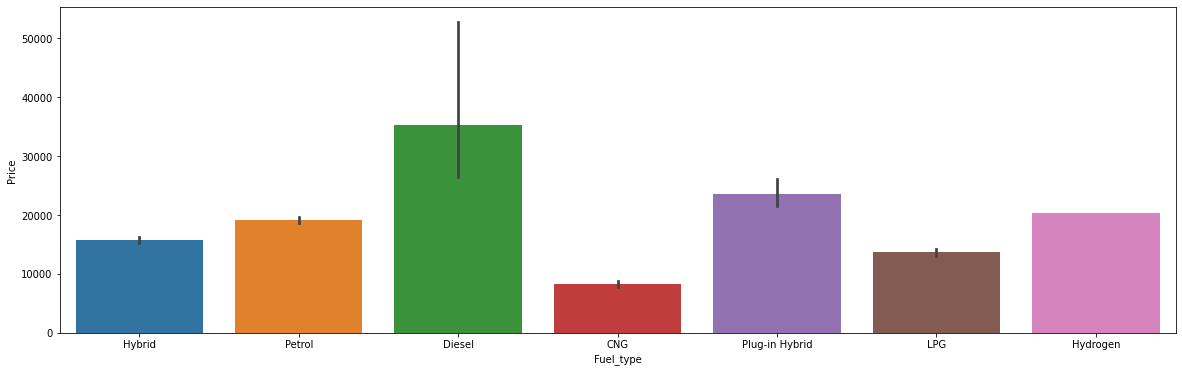

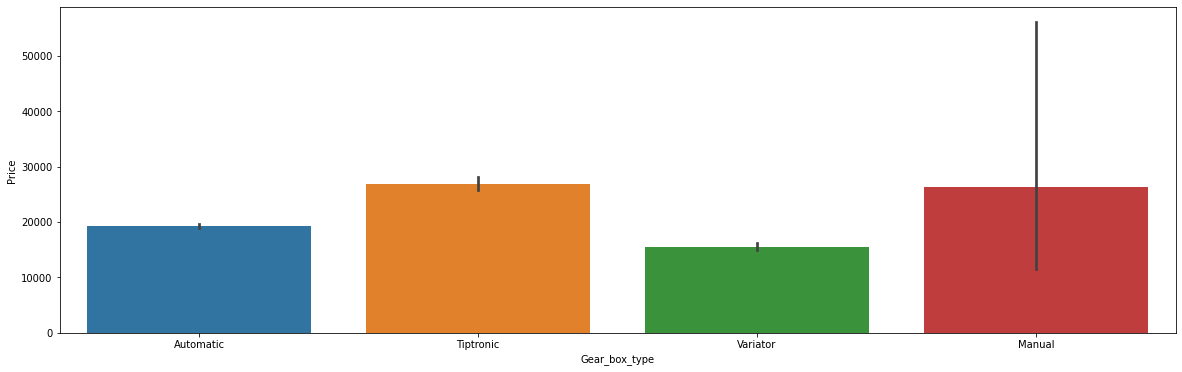

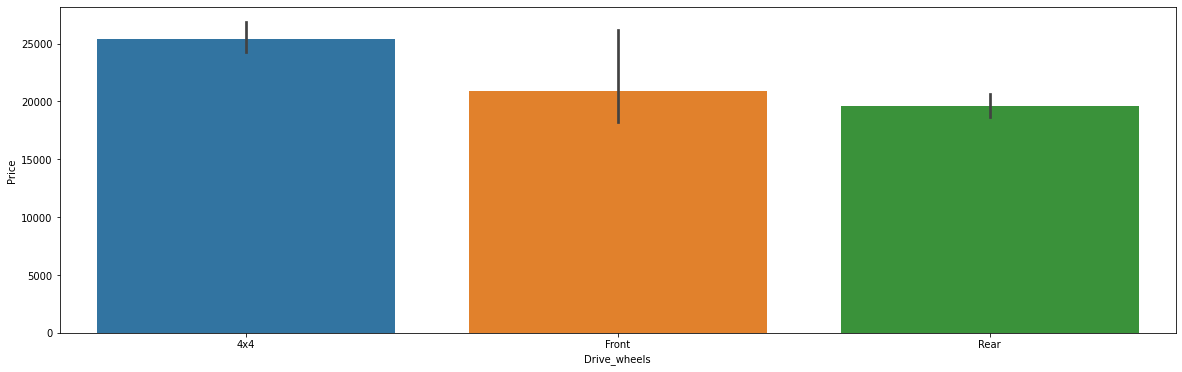

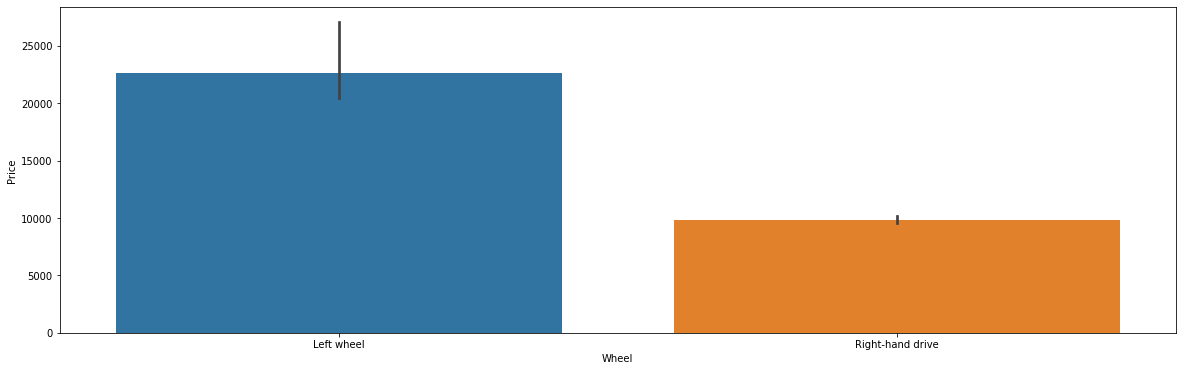

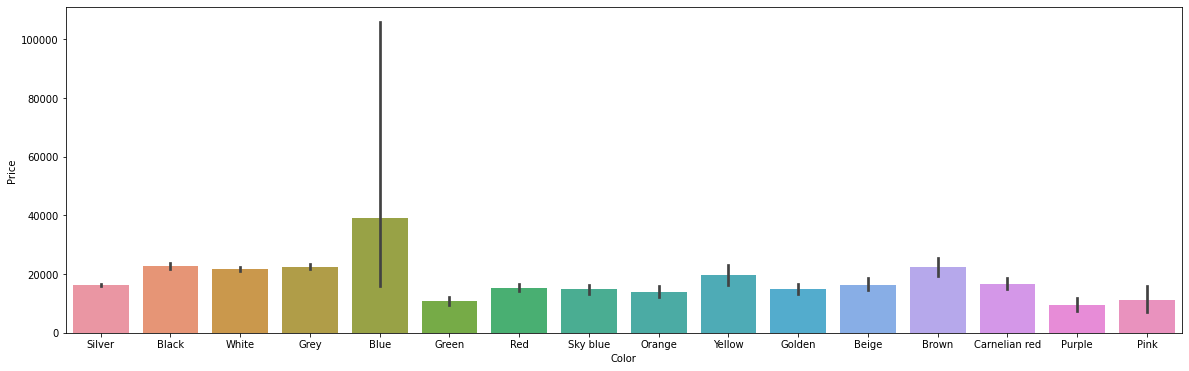

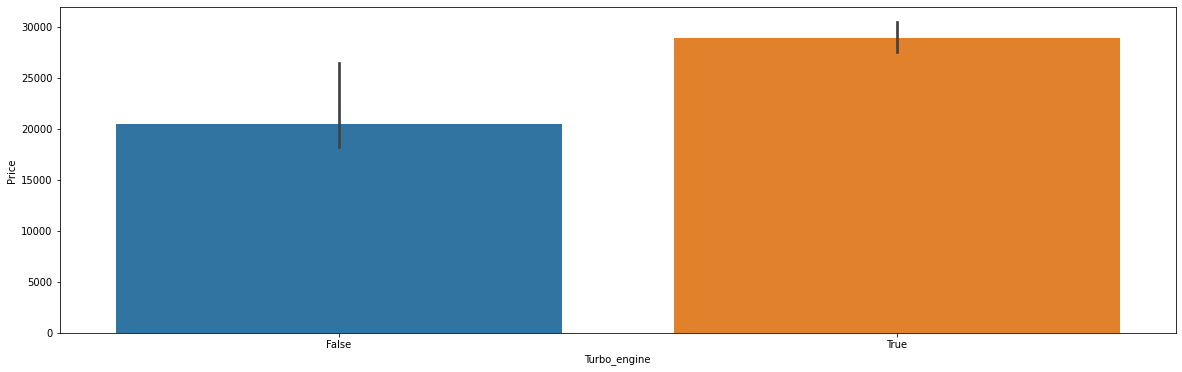

In [25]:
# Plot the categorical variables 
for col in categorical_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=data[col], y=data['Price'])

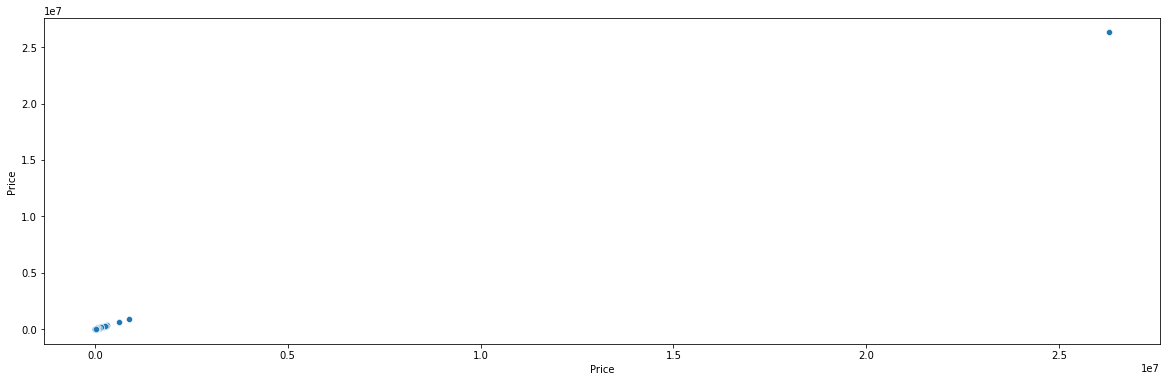

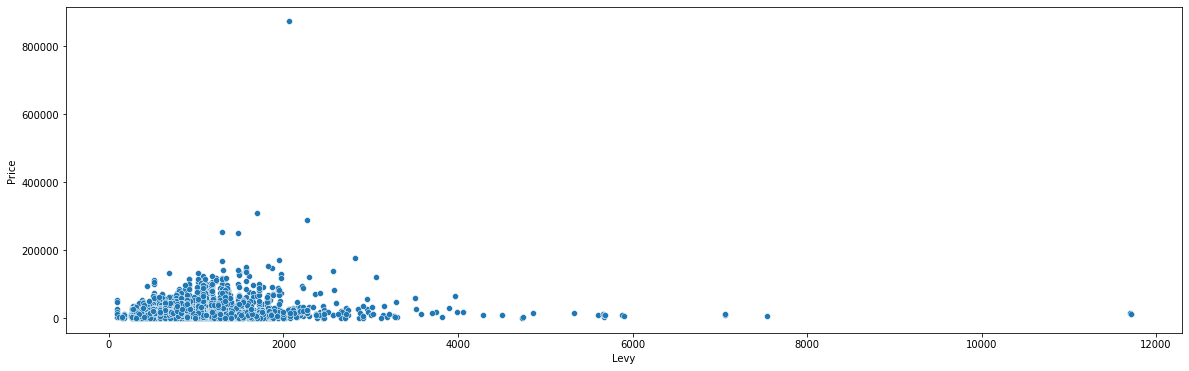

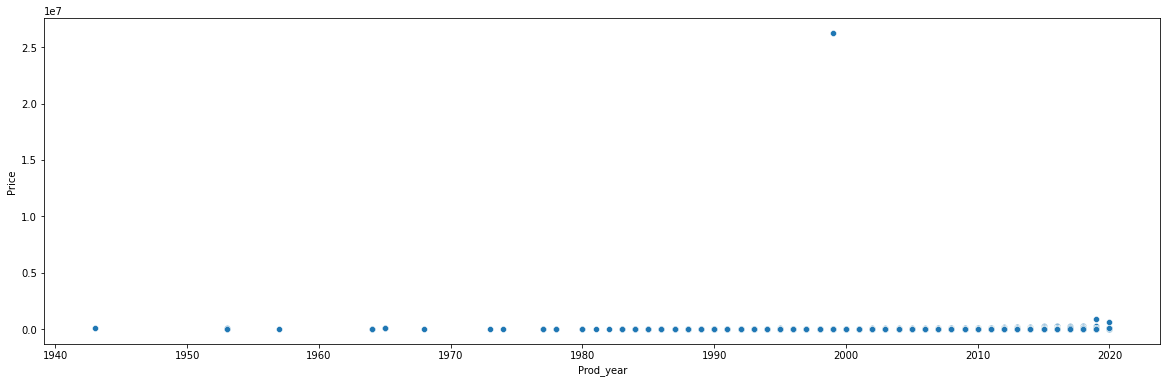

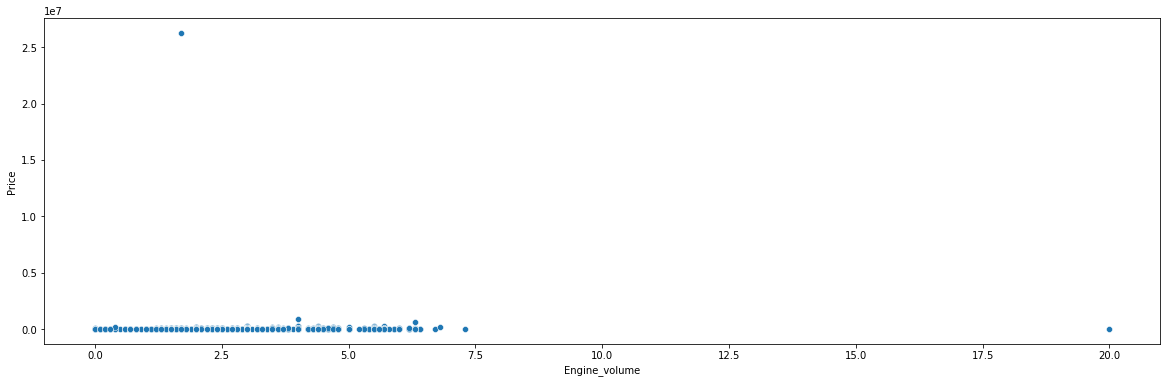

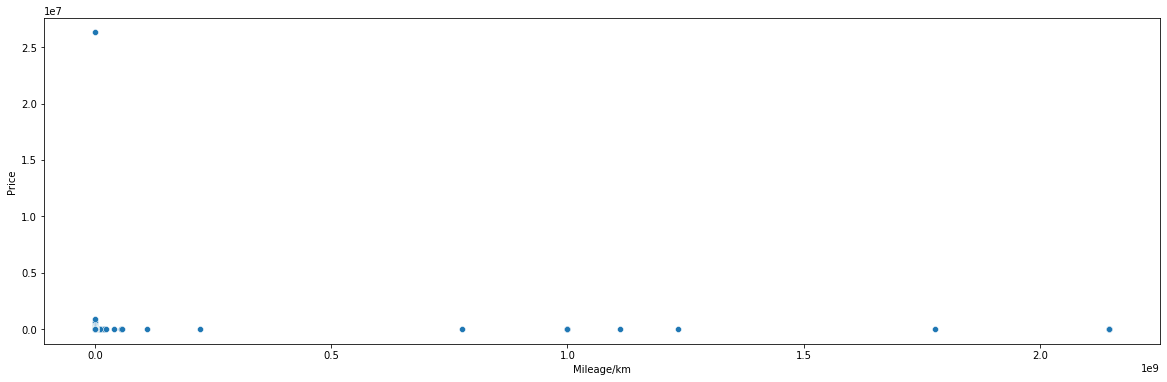

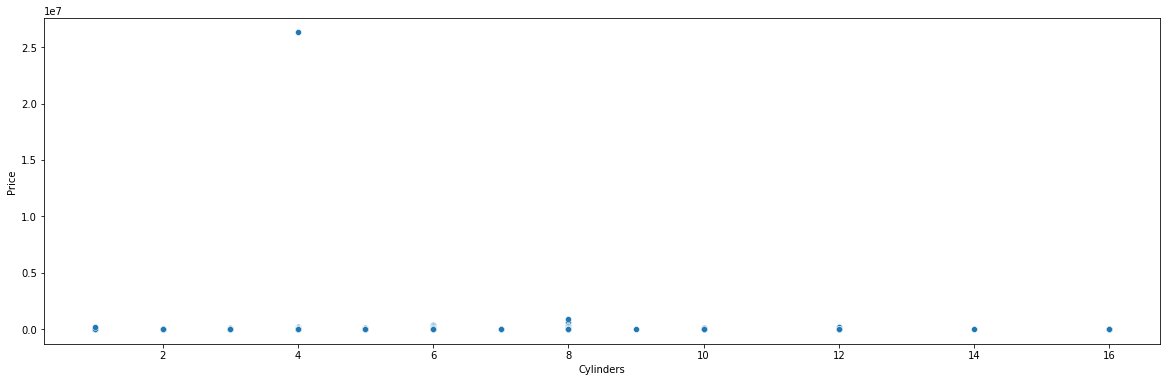

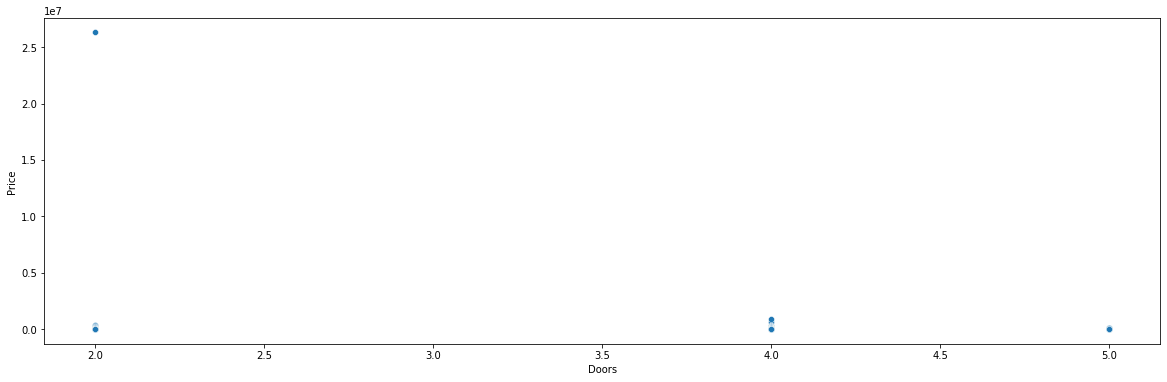

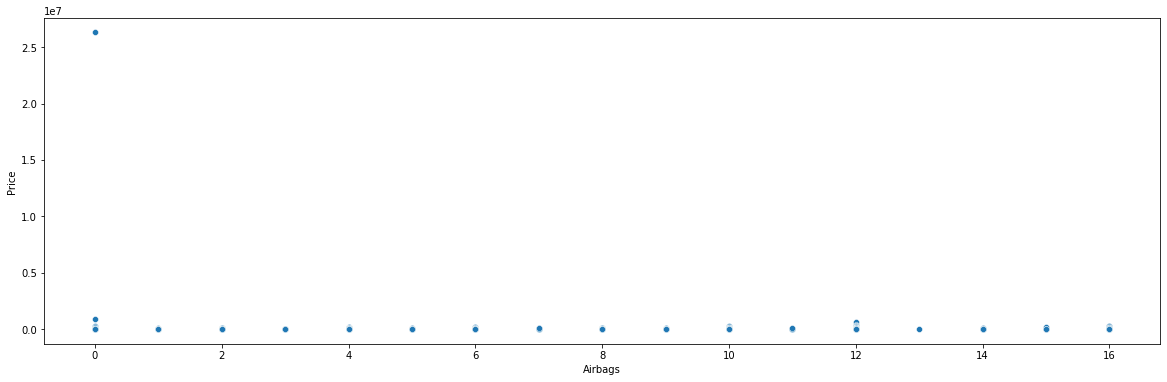

In [26]:
# Plot the numerical variables 
for col in numerical_col:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=data[col], y=data['Price'])

# Pipline

In [27]:
# Separate target from predictors
y = data.Price
X = data.drop(['Price'], axis=1)

# split the data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
# Categorical_col
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 
                    and X_train_full[cname].dtype in ['object','boolean']]

# Numerical_col
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [28]:
categorical_cols #['Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Wheel']

['Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Wheel']

In [29]:
numerical_cols  #['Levy','Prod_year', 'Engine_volume','Mileage/km','Cylinders','Doors','Airbags']

['Levy',
 'Prod_year',
 'Engine_volume',
 'Mileage/km',
 'Cylinders',
 'Doors',
 'Airbags']

In [30]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [32]:
# create the  pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('The mean absolute error is:', score) 

# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(X_valid_full) 

The mean absolute error is: 15822.130479329006


In [33]:
output = pd.DataFrame({'Price': preds_test, 'real_price': y_valid})
output

,Price,real_price
13868,18146.790000,18189
13144,61210.950000,50150
9486,27044.900000,6429
6186,8231.333111,4547
4410,18089.050000,17249
...,...,...
4297,15482.240000,12231
7001,39778.930000,40688
6420,4559.980000,2195
19206,22193.170000,22075


# Evaluate many RandomForest models

In [34]:
# we will create many models with different parametrs 
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]


def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    my_pipeline.fit(X_train, y_train)
    preds = my_pipeline.predict(X_valid)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("The Model %d has a MAE: %d" % (i+1, mae))

The Model 1 has a MAE: 15787
The Model 2 has a MAE: 15822
The Model 3 has a MAE: 8531
The Model 4 has a MAE: 9144
The Model 5 has a MAE: 17514


In [35]:
# create the pipeline
my_pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_3)
                             ])

# Preprocessing of training data, fit model 
my_pipeline_2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds_2 = my_pipeline.predict(X_valid)

In [36]:
# Evaluate the model
score_2 = mean_absolute_error(y_valid, preds_2)
print('MAE:', score_2) 
# Preprocessing of test data, fit model
preds_test_2 = my_pipeline.predict(X_valid_full) 

MAE: 15822.130479329006


In [37]:
output_2 = pd.DataFrame({'Price': preds_test_2, 'real_price': y_valid})
output_2

,Price,real_price
13868,18146.790000,18189
13144,61210.950000,50150
9486,27044.900000,6429
6186,8231.333111,4547
4410,18089.050000,17249
...,...,...
4297,15482.240000,12231
7001,39778.930000,40688
6420,4559.980000,2195
19206,22193.170000,22075


# XGBoost

In [38]:
# Read the data
y = data.Price
X = data.drop(['Price'], axis=1)

# split the data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
              

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64','boolean']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


# One-hot encode the data 
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)


In [39]:
# First we define the first model
Price_model_1 = XGBRegressor(random_state=0) 

# then we fit it
Price_model_1.fit(X_train, y_train)

# we calculate the prediction
predictions_1 = Price_model_1.predict(X_valid)

# we calculate mean_absolute_error
mae_1 = mean_absolute_error(predictions_1,y_valid) 
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 23055.798179041372


In [40]:
# we define the second model
Price_model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1,random_state=0) 

# we fit the model
Price_model_2.fit(X_train, y_train) 

# we calculate the predictions
predictions_2 = Price_model_2.predict(X_valid)

# we calculate mean_absolute_error
mae_2 = mean_absolute_error(predictions_2, y_valid) 
print("Mean Absolute Error:" , mae_2) 

Mean Absolute Error: 23061.50103640685


In [41]:
# we define the third model
Price_model_3 =XGBRegressor(n_estimators=87, learning_rate=0.01,random_state=0)

# we fit the model
Price_model_3.fit(X_train, y_train)

# we calculate predictions
predictions_3 =Price_model_3.predict(X_valid)

# we calculate mean_absolute_error
mae_3 = mean_absolute_error(predictions_3,y_valid)
print("Mean Absolute Error:" , mae_3)

Mean Absolute Error: 16048.962217258762
